<a href="https://colab.research.google.com/github/jidemaestri/Machine-Learning/blob/master/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Trees**

#### Extracted from Microsoft Learn


In [1]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/san_fran_crime.csv


--2021-12-01 23:34:24--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0s      

2021-12-01 23:34:24 (119 MB/s) - ‘graphing.py’ saved [21511/21511]

--2021-12-01 23:34:25--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/san_fran_crime.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, aw

In [2]:
dataset = pandas.read_csv('san_fran_crime.csv', delimiter="\t")


In [3]:
dataset.head()

,Category,DayOfWeek,PdDistrict,Resolution,X,Y,day_of_year,time_in_hours
0,WEAPON LAWS,5,SOUTHERN,True,-122.403405,37.775421,29,11.000000
1,WEAPON LAWS,5,SOUTHERN,True,-122.403405,37.775421,29,11.000000
2,WARRANTS,1,BAYVIEW,True,-122.388856,37.729981,116,14.983333
3,NON-CRIMINAL,2,TENDERLOIN,False,-122.412971,37.785788,5,23.833333
4,NON-CRIMINAL,5,MISSION,False,-122.419672,37.765050,1,0.500000


In [5]:
dataset.shape

(150431, 8)

In [13]:
import graphing # custom graphing code. See our GitHub repo for details
import numpy as np

# Crime category
# graphing.histogram(dataset, label_x='Category', label_y="Resolution", histfunc='sum', show=True)


In [18]:
# Crime category
#graphing.multiple_histogram(dataset, label_x='Category', label_group="Resolution", histfunc='sum', show=True)

# District
# graphing.multiple_histogram(dataset, label_group="Resolution", label_x="PdDistrict", show=True)

# Map of crimes
# graphing.scatter_2D(dataset, label_x="X", label_y="Y", label_colour="Resolution", title="GPS Coordinates", size_multiplier=0.8, show=True)

# Day of the week
# graphing.multiple_histogram(dataset, label_group="Resolution", label_x="DayOfWeek", show=True)

In [26]:
dataset["week_of_year"] = np.round(dataset.day_of_year / 7.0)
graphing.multiple_histogram(dataset, 
                    label_x='week_of_year',
                    label_group='Resolution',
                    barmode='sum', show=True)
# del dataset["week_of_year"]


TypeError: ignored

In [24]:
dataset

,Category,DayOfWeek,PdDistrict,Resolution,X,Y,day_of_year,time_in_hours,week_of_year
0,WEAPON LAWS,5,SOUTHERN,True,-122.403405,37.775421,29,11.000000,4.0
1,WEAPON LAWS,5,SOUTHERN,True,-122.403405,37.775421,29,11.000000,4.0
2,WARRANTS,1,BAYVIEW,True,-122.388856,37.729981,116,14.983333,17.0
3,NON-CRIMINAL,2,TENDERLOIN,False,-122.412971,37.785788,5,23.833333,1.0
4,NON-CRIMINAL,5,MISSION,False,-122.419672,37.765050,1,0.500000,0.0
...,...,...,...,...,...,...,...,...,...
150426,ASSAULT,5,PARK,False,-122.453982,37.771428,365,21.016667,52.0
150427,NON-CRIMINAL,5,CENTRAL,False,-122.401857,37.796626,365,8.000000,52.0
150428,LARCENY/THEFT,4,CENTRAL,False,-122.412269,37.790673,364,20.000000,52.0
150429,LARCENY/THEFT,5,CENTRAL,False,-122.406659,37.788275,365,10.000000,52.0


In [27]:
# One-hot encode categorical features
dataset = pandas.get_dummies(dataset, columns=["Category", "PdDistrict"], drop_first=False)


In [28]:
dataset.head()

,DayOfWeek,Resolution,X,Y,day_of_year,time_in_hours,week_of_year,Category_ARSON,Category_ASSAULT,Category_BAD CHECKS,Category_BRIBERY,Category_BURGLARY,Category_DISORDERLY CONDUCT,Category_DRIVING UNDER THE INFLUENCE,Category_DRUG/NARCOTIC,Category_DRUNKENNESS,Category_EMBEZZLEMENT,Category_EXTORTION,Category_FAMILY OFFENSES,Category_FORGERY/COUNTERFEITING,Category_FRAUD,Category_GAMBLING,Category_KIDNAPPING,Category_LARCENY/THEFT,Category_LIQUOR LAWS,Category_LOITERING,Category_MISSING PERSON,Category_NON-CRIMINAL,Category_OTHER OFFENSES,Category_PORNOGRAPHY/OBSCENE MAT,Category_PROSTITUTION,Category_RECOVERED VEHICLE,Category_ROBBERY,Category_RUNAWAY,Category_SECONDARY CODES,"Category_SEX OFFENSES, FORCIBLE","Category_SEX OFFENSES, NON FORCIBLE",Category_STOLEN PROPERTY,Category_SUSPICIOUS OCC,Category_TREA,Category_TRESPASS,Category_VANDALISM,Category_VEHICLE THEFT,Category_WARRANTS,Category_WEAPON LAWS,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,5,True,-122.403405,37.775421,29,11.000000,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,5,True,-122.403405,37.775421,29,11.000000,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,True,-122.388856,37.729981,116,14.983333,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,2,False,-122.412971,37.785788,5,23.833333,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,False,-122.419672,37.765050,1,0.500000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Decision Tree - Model

In [30]:

from sklearn.model_selection import train_test_split

# Split the dataset in an 85/15 train/test ratio. 
# We can afford to do this here because our dataset is very very large
# Normally we would choose a more even ratio
train, test = train_test_split(dataset, test_size=0.15, random_state=2, shuffle=True)

print("Data shape:")
print("train", train.shape)
print("test", test.shape)


Data shape:
train (127866, 55)
test (22565, 55)


In [31]:


from sklearn.metrics import balanced_accuracy_score

features = [c for c in dataset.columns if c != "Resolution"]


def fit_and_test_model(model):
    '''
    Trains a model and tests it against both train and test sets
    '''  
    global features

    # Train the model
    # x = train.features
    # y = resolution
    model.fit(train[features], train.Resolution)

    # Assess its performance
    # -- Train
    predictions = model.predict(train[features])
    train_accuracy = balanced_accuracy_score(train.Resolution, predictions)

    # -- Test
    predictions = model.predict(test[features])
    test_accuracy = balanced_accuracy_score(test.Resolution, predictions)

    return train_accuracy, test_accuracy



print("Ready")


Ready


In [32]:
import sklearn.tree

# fit a simple tree using only three levels
model = sklearn.tree.DecisionTreeClassifier(random_state=2, max_depth=3) 
train_accuracy, test_accuracy = fit_and_test_model(model)

print("Model trained!")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)


Model trained!
Train accuracy 0.6814914910099882
Test accuracy 0.6772224525427271


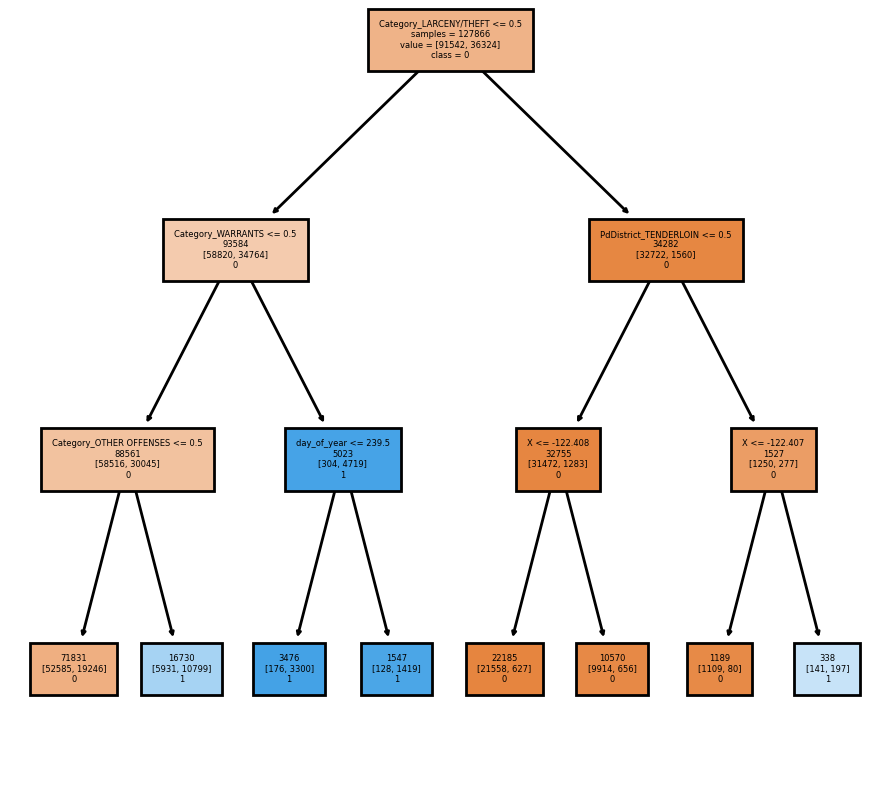

In [36]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plot = plt.subplots(figsize = (2,2), dpi=200)[0]
plot = plot_tree(model,
                fontsize=3,
                feature_names = features, 
                class_names = ['0','1'], # class_names in ascending numerical order 
                label="root",
                impurity=False,
                filled=True) 
plt.show()


## Improving performance through architecture

We will try and improve our model's performance by changing its architecture. Let's focus on the ``maximum_depth`` parameter. 

Our previous tree was relatively simple and shallow with a ``maximum_depth = 3``. Let's see what happens if we increase it to 100:


In [37]:
model = sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=100)

train_accuracy, test_accuracy = fit_and_test_model(model)
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)


Train accuracy 0.999573505019534
Test accuracy 0.776353050305668


## Overfitted!!

##### Overfitting with decision trees becomes even more obvious when we have more typical (smaller) sized datasets. Let's re-run the previous exercise but with only 100 training samples.


In [51]:
# Temporarily shrink the training set to 10000
# for this exercise to see how pruning is important
# even with moderately large datasets
full_training_set = train
train = train[:10000]


# Loop through the values below and build a model
# each time, setting the maximum depth to that value 
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,15, 20, 50, 100]
accuracy_trainset = []
accuracy_testset = []
for depth in max_depth_range:
    # Create and fit the model
    prune_model = sklearn.tree.DecisionTreeClassifier(random_state=1, max_depth=depth)

    # Calculate and record its sensitivity
    train_accuracy, test_accuracy = fit_and_test_model(prune_model)
    accuracy_trainset.append(train_accuracy)
    accuracy_testset.append(test_accuracy)

pruned_plot = pandas.DataFrame(dict(max_depth=max_depth_range, accuracy=accuracy_trainset))

In [59]:
pruned_plot

,max_depth,accuracy
0,1,0.500000
1,2,0.569016
2,3,0.684708
3,4,0.733982
4,5,0.735294
5,6,0.764070
6,7,0.748627
7,8,0.756767
8,9,0.775521
9,10,0.795330


In [63]:
type(pruned_plot)

pandas.core.frame.DataFrame

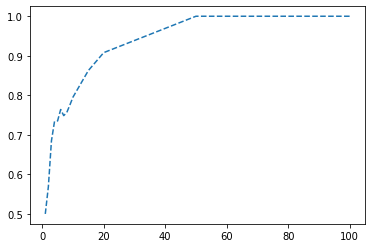

In [78]:
import matplotlib.pyplot as plt
x = pruned_plot["max_depth"]
y = pruned_plot["accuracy"]
fig = plt.plot(x, y, scalex=True, scaley=True, ls="--" ) #, x_range=max_depth_range)

In [67]:
# Roll the training set back to the full thing
train = full_training_set


In [68]:
train

,DayOfWeek,Resolution,X,Y,day_of_year,time_in_hours,week_of_year,Category_ARSON,Category_ASSAULT,Category_BAD CHECKS,Category_BRIBERY,Category_BURGLARY,Category_DISORDERLY CONDUCT,Category_DRIVING UNDER THE INFLUENCE,Category_DRUG/NARCOTIC,Category_DRUNKENNESS,Category_EMBEZZLEMENT,Category_EXTORTION,Category_FAMILY OFFENSES,Category_FORGERY/COUNTERFEITING,Category_FRAUD,Category_GAMBLING,Category_KIDNAPPING,Category_LARCENY/THEFT,Category_LIQUOR LAWS,Category_LOITERING,Category_MISSING PERSON,Category_NON-CRIMINAL,Category_OTHER OFFENSES,Category_PORNOGRAPHY/OBSCENE MAT,Category_PROSTITUTION,Category_RECOVERED VEHICLE,Category_ROBBERY,Category_RUNAWAY,Category_SECONDARY CODES,"Category_SEX OFFENSES, FORCIBLE","Category_SEX OFFENSES, NON FORCIBLE",Category_STOLEN PROPERTY,Category_SUSPICIOUS OCC,Category_TREA,Category_TRESPASS,Category_VANDALISM,Category_VEHICLE THEFT,Category_WARRANTS,Category_WEAPON LAWS,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
143463,2,False,-122.389518,37.772468,40,17.000000,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9352,7,False,-122.500177,37.762600,3,16.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
53065,4,False,-122.460862,37.714951,189,6.916667,27.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
132536,4,False,-122.409795,37.780036,308,12.500000,44.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
122476,3,False,-122.421238,37.776625,174,18.333333,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60579,5,False,-122.420856,37.799437,176,12.000000,25.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
127112,1,False,-122.422176,37.798311,242,18.250000,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
25743,6,False,-122.406814,37.752991,37,20.083333,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
96385,7,False,-122.472389,37.717501,157,18.583333,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
